# 1982-2022 NBA Player Statistics 
data obtained from [HERE](https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share)

The goal with this data set is to predict player mvp and some analytical analysis on the players and teams.

In [82]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

from sklearn.neighbors import KNeighborsRegressor

In [14]:
data= pd.read_csv('./data_files/NBA_Dataset.csv')

In [15]:
data.head()

,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
0,0,1982,Kareem Abdul-Jabbar*,C,34,LAL,76,76.0,35.2,9.9,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.0
1,1,1982,Alvan Adams,C,27,PHO,79,75.0,30.3,6.4,...,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.0
2,2,1982,Mark Aguirre,SF,22,DAL,51,20.0,28.8,7.5,...,29.8,1.0,0.8,1.9,0.061,2.3,-1.6,0.7,1.0,0.0
3,3,1982,Danny Ainge,SG,22,BOS,53,1.0,10.6,1.5,...,21.5,-0.3,0.8,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.0
4,4,1982,Tiny Archibald*,PG,33,BOS,68,51.0,31.9,4.5,...,17.9,3.4,1.8,5.2,0.115,1.4,-1.3,0.1,1.1,0.0


In [16]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
position_age = data.groupby('pos')['age'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


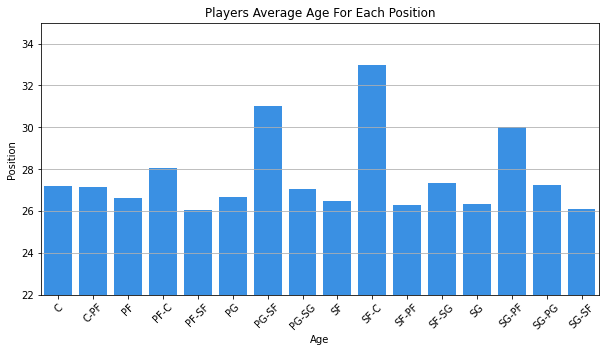

In [18]:
fig = plt.figure(figsize=(10,5))

sns.barplot(position_age['pos'], position_age['age'], color='dodgerblue')

plt.title("Players Average Age For Each Position")

plt.xlabel('Age')
plt.ylabel('Position')

plt.ylim(22,35)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [19]:
team_fg_pct  = data.groupby('team_id')['fg_pct'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


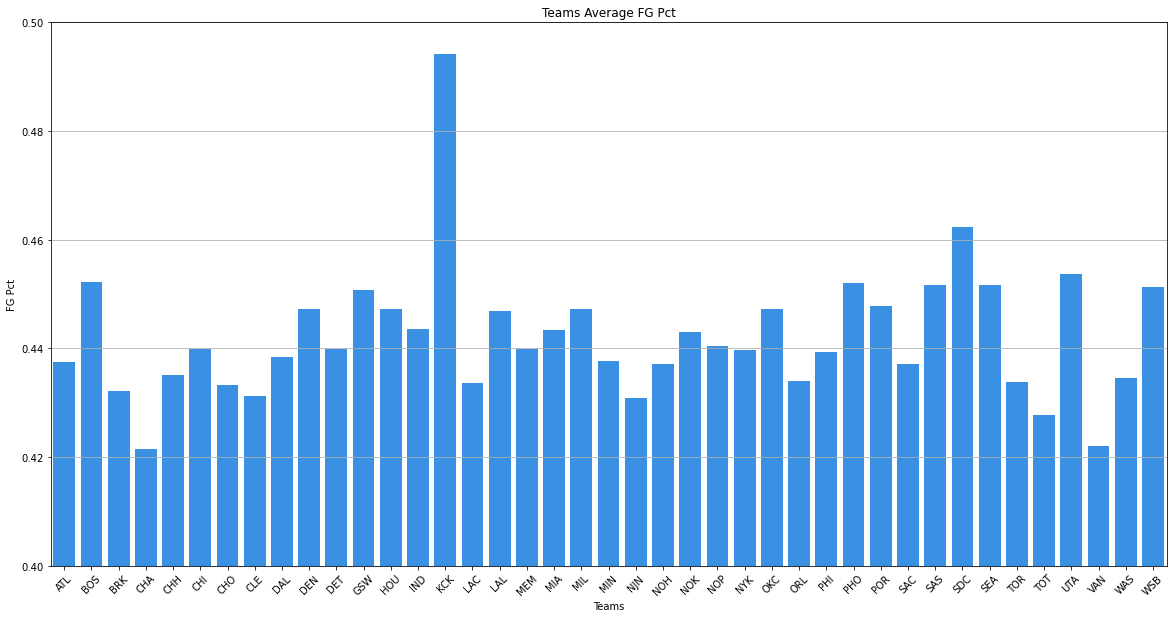

In [20]:
fig = plt.figure(figsize=(20,10))

sns.barplot(team_fg_pct['team_id'], team_fg_pct['fg_pct'], color='dodgerblue')

plt.title("Teams Average FG Pct")

plt.xlabel('Teams')
plt.ylabel('FG Pct')

plt.ylim(.4, .5)


plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
season_22 = data[data['season'] == 2022]

In [22]:
team_fg_pct  = season_22 .groupby('team_id')['fg_pct'].mean().reset_index()

In [23]:
team_fg_pct

,team_id,fg_pct
0,ATL,0.435684
1,BOS,0.463400
2,BRK,0.470500
3,CHI,0.444056
4,CHO,0.428933
5,CLE,0.465789
6,DAL,0.399722
7,DEN,0.458471
8,DET,0.358500
9,GSW,0.471938


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


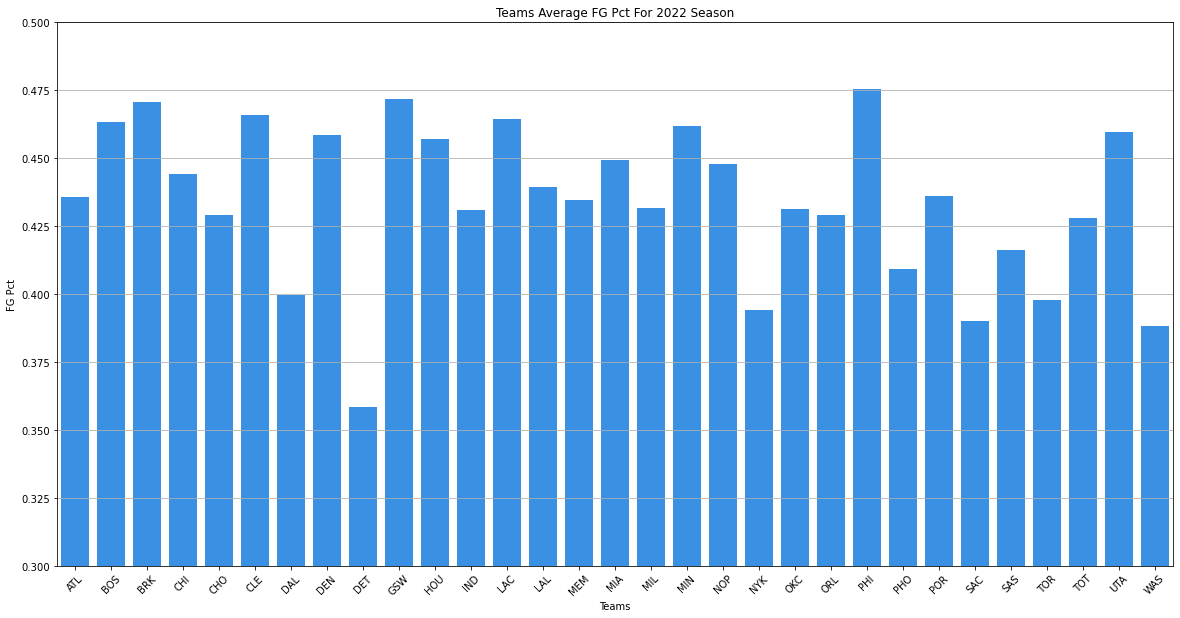

In [24]:
fig = plt.figure(figsize=(20,10))

sns.barplot(team_fg_pct['team_id'], team_fg_pct['fg_pct'], color='dodgerblue')

plt.title("Teams Average FG Pct For 2022 Season")

plt.xlabel('Teams')
plt.ylabel('FG Pct')

plt.ylim(.3, .5)


plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Award Share - The formula is (award points) / (maximum number of award points). For example, in the 2002-03 MVP voting Tim Duncan had 962 points out of a possible 1190. His MVP award share is 962 / 1190 = 0.81. [Referance](https://www.basketball-reference.com/about/glossary.html)


since not every player is in contention for mvp every year siphoning out all the ones that have a 0.0 for award share ie. they wernt apart of the voting 

In [30]:
award_data = data[data['award_share'] != 0.0]

In [35]:
award_data

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
51,1982,Michael Cooper,SG,25,LAL,76,14.0,28.9,5.0,9.8,...,17.5,2.4,2.6,5.0,0.109,-0.3,1.2,0.9,1.6,0.004
139,1982,Marques Johnson,SF,25,MIL,60,52.0,31.7,6.7,12.7,...,22.1,3.5,2.7,6.2,0.158,2.9,0.0,2.9,2.3,0.004
245,1982,Dan Roundfield,PF,28,ATL,61,58.0,36.3,7.0,14.9,...,24.6,2.4,4.1,6.5,0.141,1.6,0.7,2.3,2.4,0.020
272,1982,Mychal Thompson,C,27,POR,79,78.0,39.6,8.6,16.5,...,22.9,4.5,3.6,8.2,0.125,2.3,0.0,2.3,3.4,0.001
276,1982,Kelly Tripucka,SF,22,DET,82,82.0,37.5,7.8,15.6,...,23.3,5.4,2.1,7.5,0.117,1.5,-1.3,0.2,1.7,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,2022,LeBron James,SF,37,LAL,56,56.0,37.2,11.4,21.8,...,32.3,5.2,2.3,7.5,0.172,6.9,0.8,7.7,5.1,0.001
17381,2022,Nikola Jokić,C,26,DEN,74,74.0,33.5,10.3,17.7,...,31.9,10.8,4.5,15.2,0.296,9.2,4.5,13.7,9.8,0.875
17481,2022,Ja Morant,PG,22,MEM,57,57.0,33.1,10.2,20.6,...,33.7,4.6,2.1,6.7,0.171,6.2,-0.1,6.1,3.9,0.010
17529,2022,Chris Paul,PG,36,PHO,65,65.0,32.9,5.6,11.3,...,19.7,5.8,3.6,9.4,0.210,3.1,2.3,5.4,4.0,0.002


In [85]:
X = award_data.drop(columns=['player', 'season', 'team_id'])
y = award_data['award_share']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [87]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_train = X_train[['pos']]
ohe_test = X_test[['pos']]

ohe_train = ohe.fit_transform(ohe_train)
ohe_test= ohe.transform(ohe_test)

In [88]:
scaler = StandardScaler()

scaled_train = X_train.drop(columns=['pos'])
scaled_test = X_test.drop(columns=['pos'])

scaled_train = scaler.fit_transform(scaled_train)
scaled_test = scaler.transform(scaled_test)

In [89]:
X_train = np.concatenate((ohe_train,scaled_train), axis=1)
X_test = np.concatenate((ohe_test,scaled_test), axis=1)

In [46]:
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)

print(f'Train: {knn.score(X_train, y_train)}')
print(f'Train: {knn.score(X_test, y_test)}')

Train: 0.7964211404442882
Train: 0.5764840088225628


Grid Search for KNN Regressor 

In [91]:
knn_params = {
    'n_neighbors' : [5,10,15],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'], 
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

In [92]:
grid_knn = GridSearchCV(KNeighborsRegressor() ,param_grid=knn_params)

grid_knn.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [93]:
grid_knn.best_params_

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 15,
 'weights': 'distance'}

In [97]:
knn = KNeighborsRegressor(algorithm= 'ball_tree',metric= 'manhattan',n_neighbors= 15,weights= 'distance')

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#print(f'Train: {knn.score(X_train, y_train)}')
print(f'Train: {knn.score(X_test, y_pred)}')

Train: 1.0
Train: 1.0
